# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Loading Data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Viewing directory of dataset

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

# Storing relevant data to DataFrame

In [4]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['Price'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
len(df)

506

# Checking correlation among the variables

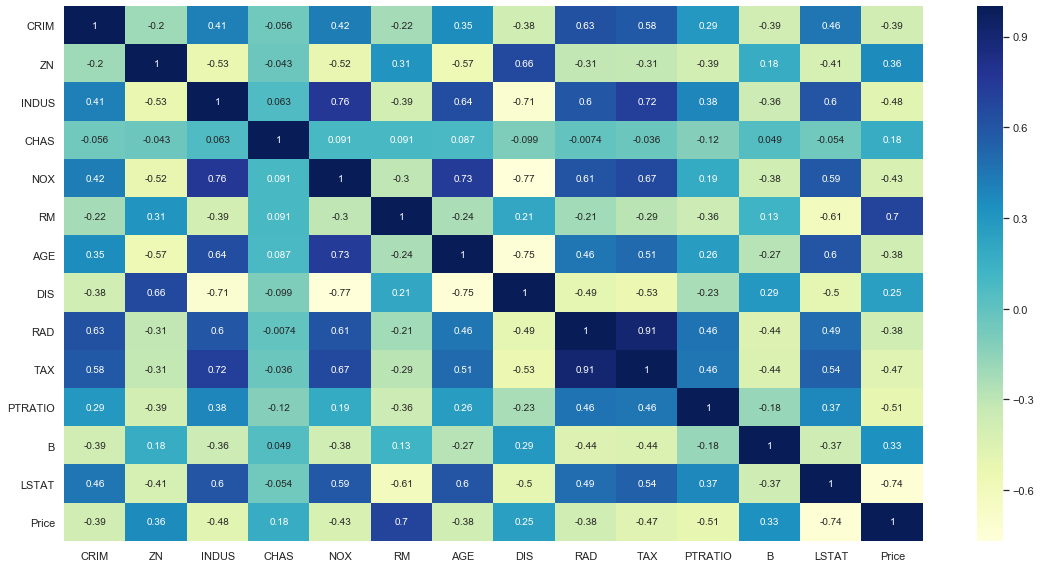

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.tight_layout()

# Specifying our features and labels

In [9]:
X = df.drop('Price', axis=1) # Feature columns (Independent variable)
y = df['Price']              # Label column (Dependent variable)

Checking the lengths

In [10]:
len(X), len(y)

(506, 506)

# Splitting data for training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(404, 102, 404, 102)

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)

# Training model

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

# Making predictions on test data

In [16]:
preds = lm.predict(X_test)
preds[0:5]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992])

# Checking the relation between test y labels and our predicted y values

Text(0, 0.5, 'Y Predicted')

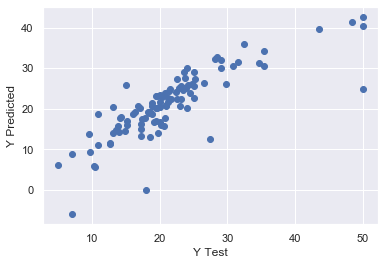

In [17]:
plt.scatter(y_test, preds)
plt.xlabel("Y Test")
plt.ylabel("Y Predicted")

# Model accuracy

In [18]:
print("Linear model score:", np.round(lm.score(X_test, y_test), 4))

Linear model score: 0.6688


# Model parameters

## Y intercept

In [19]:
print("Linear model intercept:",lm.intercept_)

Linear model intercept: 30.246750993924152


## X Coefficients

In [20]:
coeffs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


# Cost functions to judge the model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE  :", mean_absolute_error(y_test, preds))
print("MSE  :", mean_squared_error(y_test, preds))
print("RMSE :", np.sqrt(mean_squared_error(y_test, preds)))

MAE  : 3.1890919658878296
MSE  : 24.291119474973367
RMSE : 4.928602182665321


# Checking the distribution of our residuals
Our residuals in this case are not normally distributed. The distribution is right skewed. Therefore, this Linear Model was not the best choice for this regression analysis.

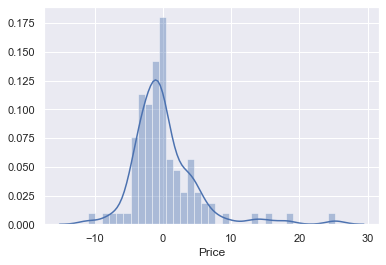

In [22]:
sns.distplot((y_test - preds), bins=35)